In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
data=pd.read_csv('/home/susmitha/Downloads/Weather.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.shape

(119040, 31)

In [5]:
data.describe

<bound method NDFrame.describe of           STA        Date  Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1   1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2       0          NaN  28.888889  21.666667   
2       10001    1942-7-3    2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4    2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5       0          NaN  26.666667  21.666667   
5       10001    1942-7-6       0          NaN  26.666667  21.666667   
6       10001    1942-7-7       T          NaN  28.333333  22.777778   
7       10001    1942-7-8   3.556          NaN  26.666667  22.222222   
8       10001    1942-7-9       T          NaN  27.222222  22.777778   
9       10001   1942-7-10   3.556          NaN  25.555556  21.666667   
10      10001   1942-7-11       0          NaN  25.555556  21.666667   
11      10001   1942-7-12   0.508          NaN  24.444444  22.222222   
12      10001   1942-7-13     

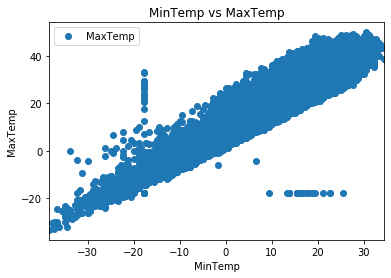

In [6]:
data.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

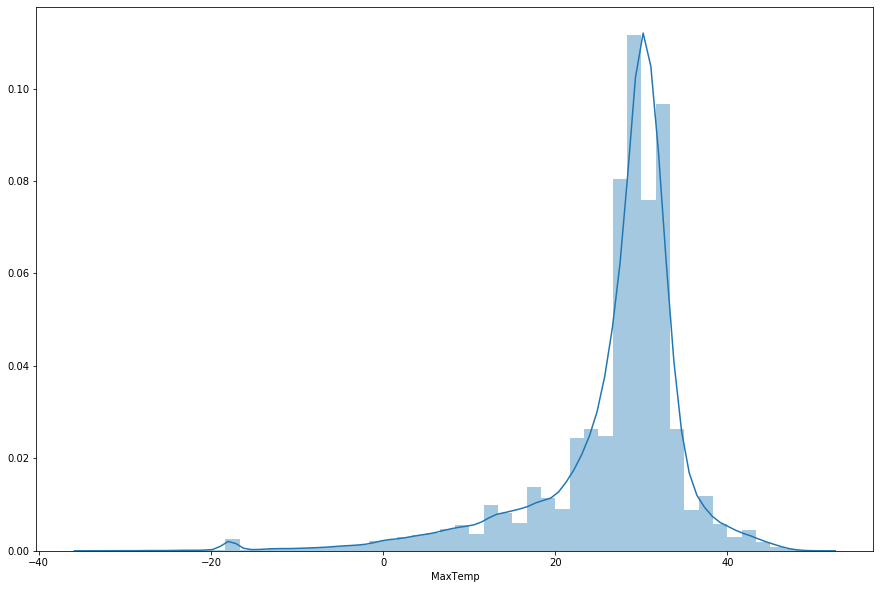

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['MaxTemp'])

In [8]:
X = data['MinTemp'].values.reshape(-1,1)
y = data['MaxTemp'].values.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [14]:
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
5,37.222222,30.602551
6,22.222222,11.684452
7,35.555556,33.670351
8,30.555556,30.602551
9,28.888889,32.647751


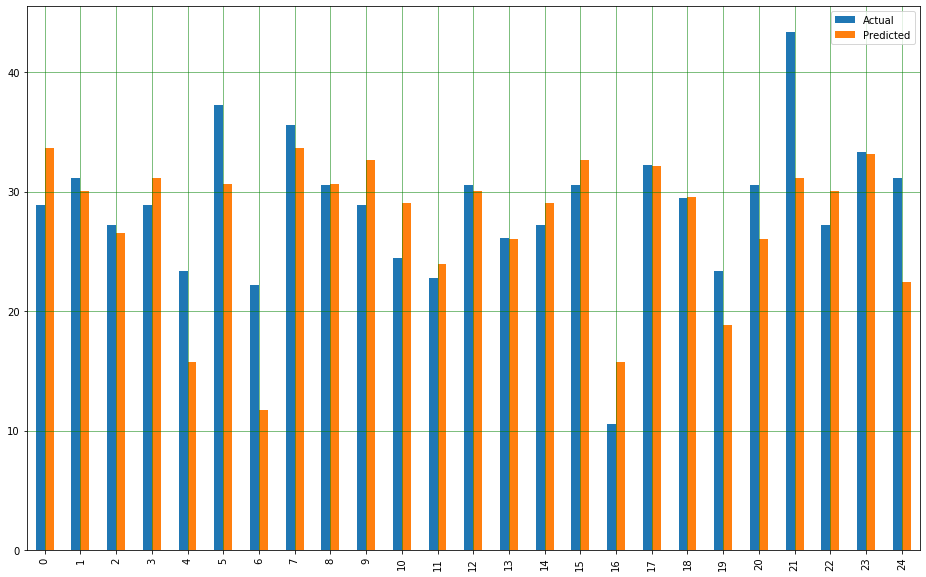

In [15]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

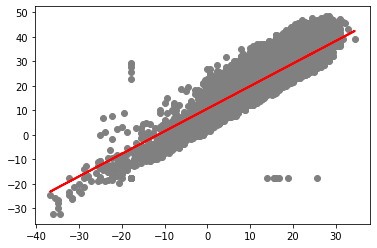

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785445
Mean Squared Error: 17.631568097568472
Root Mean Squared Error: 4.198996082109208


In [18]:
X[23809]=32

In [22]:
y_pred[23807]

array([31.62515124])